# Дополнительные вычисления

## Графики для KLD

### Functions

In [1]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import json
from tqdm import tqdm
from scipy import stats
import numpy as np
from collections import Counter
import scipy
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sns.set(rc={'figure.figsize':(15, 6)})

In [4]:
path = '/content/drive/MyDrive/trees'

In [5]:
def get_vs(l1, l2):
    v, s1 = np.histogram(np.log(l1[l1 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
    s = sum(v)
    v1 = v / s
    v, s2 = np.histogram(np.log(l2[l2 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
    s = sum(v)
    v2 = v / s
    return v1, v2, s1, s2

In [7]:
def get_ax(ax, s1, s2, v1, v2, one, two):
    ax.set_xlabel('log of probability')
    ax.set_ylabel('proportion')
    ax.title.set_text(f'{two} to {one}')
    ax.bar(s1[:-1], v1, label=f'{one}')
    ax.bar(s2[:-1], v2, alpha=0.4, label=f'{two} to {one}')
    ax.legend()

In [8]:
def get_data(one, two, func=np.array):
    with open(f'{path}/stats_ref/rus/{one}/{two}/{q}.json', encoding='utf-8') as f:
        l2 = func(json.load(f))
    with open(f'{path}/stats_ref/rus/{one}/{one}/{q}.json', encoding='utf-8') as f:
        l1 = func(json.load(f))
    return l1, l2

In [21]:
def get_two(one, two):
    f, axs = plt.subplots(1, 2, sharex=True, sharey=True)
    l1, l2 = get_data(one, two)
    v1, v2, s1, s2 = get_vs(l1, l2)
    get_ax(axs[0], s1, s2, v1, v2, one, two)
    
    l1, l2 = get_data(two, one)
    v1, v2, s1, s2 = get_vs(l1, l2)
    get_ax(axs[1], s1, s2, v1, v2, two, one)

### Graphics

In [22]:
q = 'depth_pos'

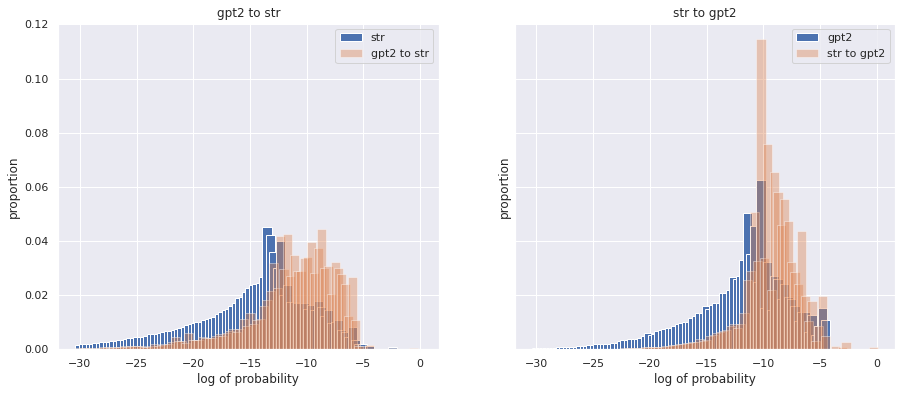

In [23]:
get_two('str', 'gpt2')

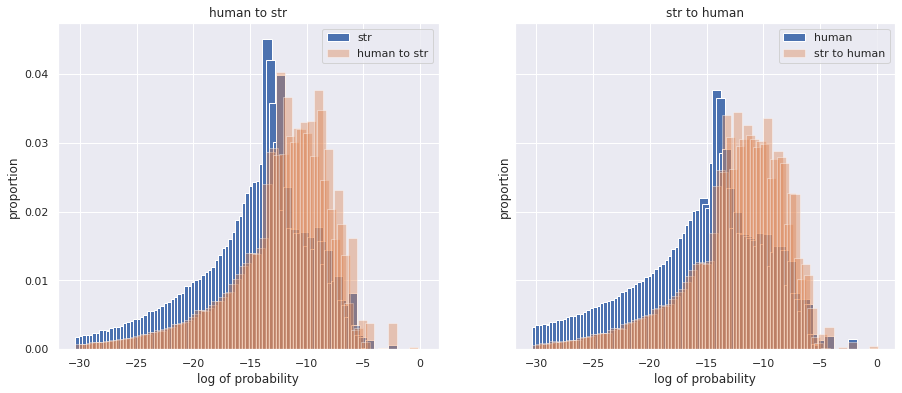

In [ ]:
get_two('str', 'human')

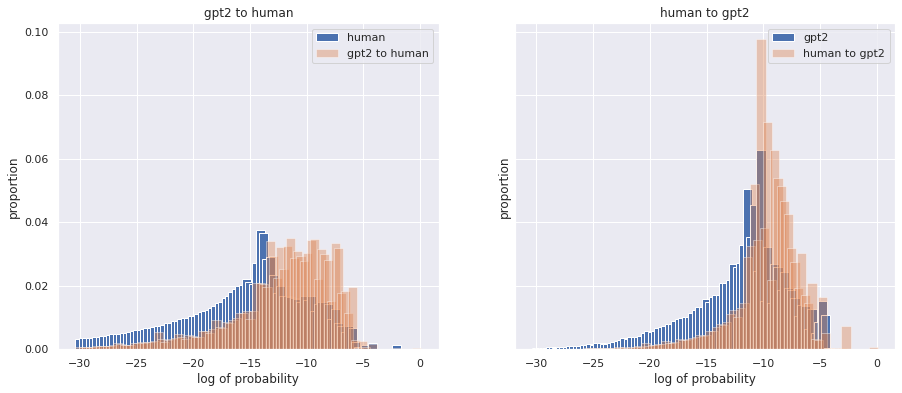

In [ ]:
get_two('human', 'gpt2')

### One-side graphics

In [ ]:
with open(f'stats_ref/rus/str/gpt2/{q}.json', encoding='utf-8') as f:
    l1 = np.array(json.load(f))
with open(f'stats_ref/rus/str/str/{q}.json', encoding='utf-8') as f:
    l2 = np.array(json.load(f))

In [ ]:
v, s1 = np.histogram(np.log(l1[l1 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v1 = v / s
v, s2 = np.histogram(np.log(l2[l2 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v2 = v / s

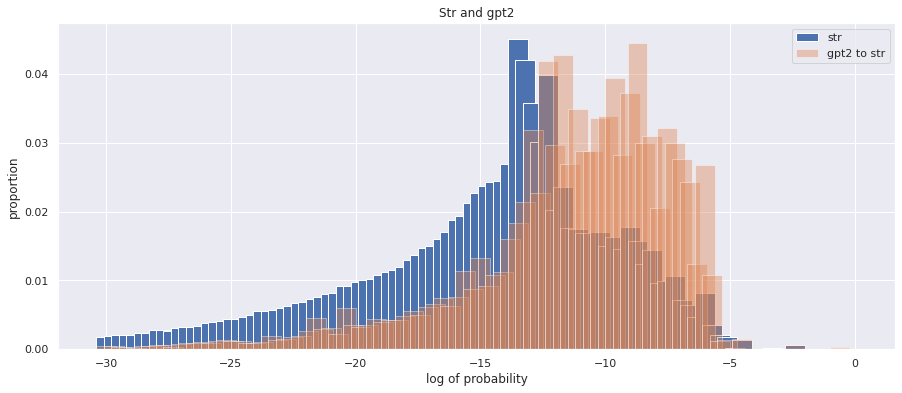

In [ ]:
plt.title('Str and gpt2')
plt.xlabel('log of probability')
plt.ylabel('proportion')
plt.bar(s2[:-1], v2, label='str')
plt.bar(s1[:-1], v1, alpha=0.4, label='gpt2 to str')
plt.legend()

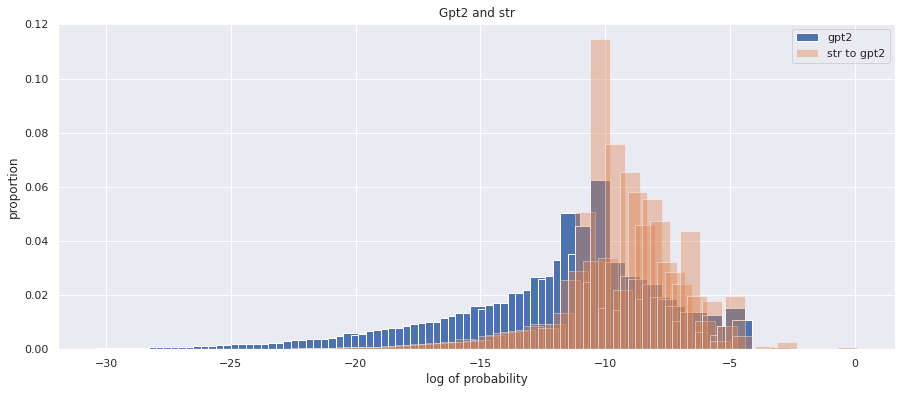

In [ ]:
with open(f'stats_ref/rus/gpt2/str/{q}.json', encoding='utf-8') as f:
    l1 = np.array(json.load(f))
with open(f'stats_ref/rus/gpt2/gpt2/{q}.json', encoding='utf-8') as f:
    l2 = np.array(json.load(f))
    
v, s1 = np.histogram(np.log(l1[l1 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v1 = v / s
v, s2 = np.histogram(np.log(l2[l2 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v2 = v / s

plt.title('Gpt2 and str')
plt.xlabel('log of probability')
plt.ylabel('proportion')
plt.bar(s2[:-1], v2, label='gpt2')
plt.bar(s1[:-1], v1, alpha=0.4, label='str to gpt2')
plt.legend()

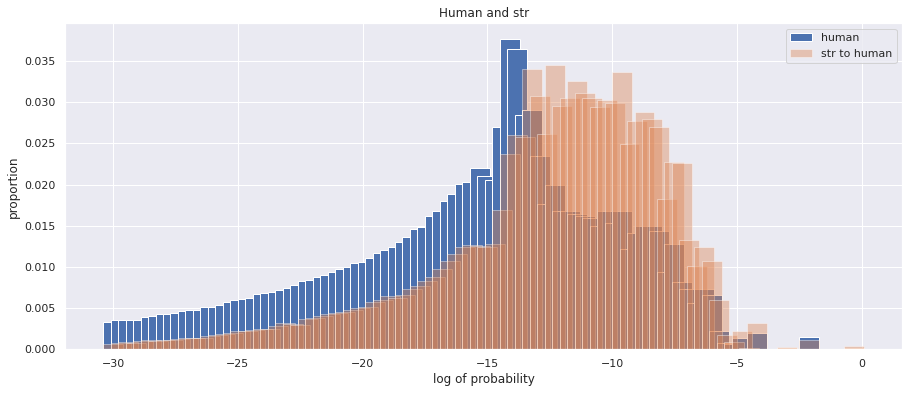

In [ ]:
with open(f'stats_ref/rus/human/str/{q}.json', encoding='utf-8') as f:
    l1 = np.array(json.load(f))
with open(f'stats_ref/rus/human/human/{q}.json', encoding='utf-8') as f:
    l2 = np.array(json.load(f))
    
v, s1 = np.histogram(np.log(l1[l1 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v1 = v / s
v, s2 = np.histogram(np.log(l2[l2 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v2 = v / s

plt.title('Human and str')
plt.xlabel('log of probability')
plt.ylabel('proportion')
plt.bar(s2[:-1], v2, label='human')
plt.bar(s1[:-1], v1, alpha=0.4, label='str to human')
plt.legend()

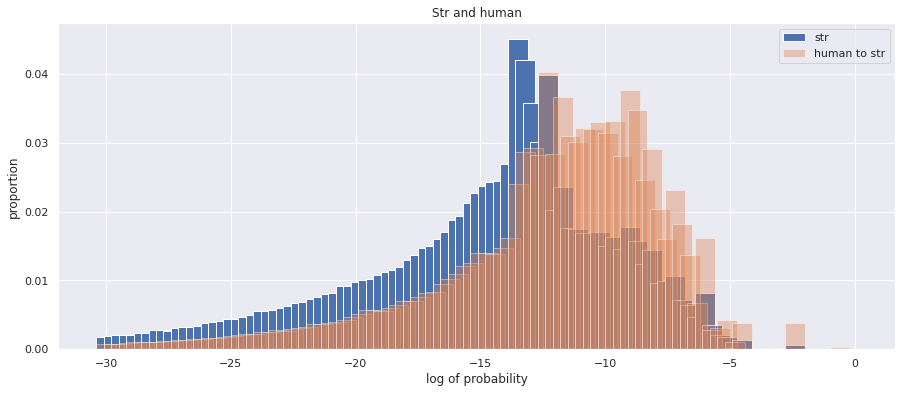

In [ ]:
with open(f'stats_ref/rus/str/human/{q}.json', encoding='utf-8') as f:
    l1 = np.array(json.load(f))
with open(f'stats_ref/rus/str/str/{q}.json', encoding='utf-8') as f:
    l2 = np.array(json.load(f))
    
v, s1 = np.histogram(np.log(l1[l1 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v1 = v / s
v, s2 = np.histogram(np.log(l2[l2 > 0]), bins=100, range=(-30, 0), normed=None, weights=None, density=None)
s = sum(v)
v2 = v / s

plt.title('Str and human')
plt.xlabel('log of probability')
plt.ylabel('proportion')
plt.bar(s2[:-1], v2, label='str')
plt.bar(s1[:-1], v1, alpha=0.4, label='human to str')
plt.legend()

## Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def read_data(tp='foreign'):
    total = {}
    for el in os.listdir(f'{path}/probs/{tp}'):
        name = el.split('.')[0]
        if name not in total:
            total[name] = {}
        with open(f'{path}/probs/{tp}/{el}', encoding='utf-8') as f:
            total[name] = json.load(f)
    return total

In [ ]:
data = read_data()

In [ ]:
with open(f'{path}/probs/order.txt', encoding='utf-8') as f:
    order = f.read().splitlines()

In [ ]:
def get_heatmap(data, key, x, order, keys=None, func=np.mean):
    small_data = {}
    for el in order:
        if el in data:
            small_data[el] = {}
            for el1 in order:
                if el1 in data[el]:
                    if keys or 'mean' in key:
                        if key == 'mean_all':
                            keys = ['width', 'width_no', 'depth', 'depth_no', 'size', 'size_no', 'sl', 'sl_no']
                        elif key == 'mean_no':
                            keys = ['width_no', 'depth_no', 'size_no', 'sl_no']
                        elif key == 'mean_yes':
                            keys = ['width', 'depth', 'size', 'sl']
                        small_data[el][el1] = func([data[el][el1][i][x] for i in keys])
                    else:
                        small_data[el][el1] = data[el][el1][key][x]
    df_old = pd.DataFrame(small_data).transpose().fillna(0)
    df = df_old.to_numpy()
    sns.heatmap(df_old, cmap='terrain')
    return df

In [ ]:
sns.set(rc={'figure.figsize':(13, 10)})

In [ ]:
with open(f'{path}/probs/order_new.txt', encoding='utf-8') as f:
    order_new = f.read().splitlines()

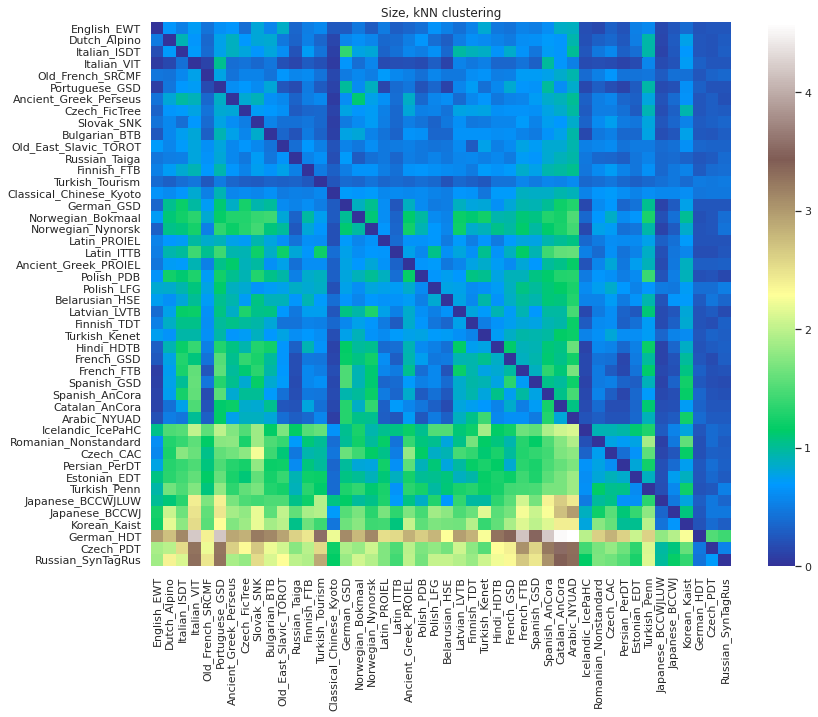

In [ ]:
plt.title('Size, kNN clustering')
_ = get_heatmap(data, 'size_no', 1, order_new)

In [ ]:
x = get_heatmap(data, 'size_no', 1, order)

In [ ]:
def get_kmeans(data, n):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(x)
    print(n, kmeans.inertia_)
    return kmeans.predict(x), kmeans.cluster_centers_, kmeans.inertia_

In [ ]:
def get_clusters(langs, clusters):
    res = {}
    for i, lang in enumerate(langs):
        if clusters[i] not in res:
            res[clusters[i]] = []
        res[clusters[i]].append(lang)
    return res

In [ ]:
res = {}
for i in range(2, 10):
    cls, ctrs, inr = get_kmeans(x, i)
    res[i] = {'inertia': inr, 'centers': ctrs, 'classes': get_clusters(order, cls)}

2 244.43698705953298
3 148.44613079085218
4 117.1371770008235
5 93.7009970673528
6 81.70310314982862
7 72.8419987648009
8 67.37258920518276
9 61.65592617032499


In [ ]:
res[7]['classes']

{0: ['Japanese_BCCWJ', 'Korean_Kaist'],
 1: ['English_EWT',
  'Dutch_Alpino',
  'Italian_ISDT',
  'Italian_VIT',
  'Old_French_SRCMF',
  'Portuguese_GSD',
  'Ancient_Greek_Perseus',
  'Czech_FicTree',
  'Slovak_SNK',
  'Bulgarian_BTB',
  'Old_East_Slavic_TOROT',
  'Russian_Taiga',
  'Finnish_FTB',
  'Turkish_Tourism',
  'Classical_Chinese_Kyoto'],
 2: ['Icelandic_IcePaHC',
  'Romanian_Nonstandard',
  'Czech_CAC',
  'Persian_PerDT',
  'Estonian_EDT',
  'Turkish_Penn',
  'Japanese_BCCWJLUW'],
 3: ['German_HDT'],
 4: ['German_GSD',
  'Norwegian_Bokmaal',
  'Norwegian_Nynorsk',
  'Latin_PROIEL',
  'Latin_ITTB',
  'Ancient_Greek_PROIEL',
  'Polish_PDB',
  'Polish_LFG',
  'Belarusian_HSE',
  'Latvian_LVTB',
  'Finnish_TDT',
  'Turkish_Kenet',
  'Hindi_HDTB'],
 5: ['French_GSD',
  'French_FTB',
  'Spanish_GSD',
  'Spanish_AnCora',
  'Catalan_AnCora',
  'Arabic_NYUAD'],
 6: ['Czech_PDT', 'Russian_SynTagRus']}

## Subtrees

### Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from drive.MyDrive.trees.drawing import draw_tree
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import json
from tqdm import tqdm
from scipy import stats
import numpy as np
from collections import Counter
import scipy
import pandas as pd

path = '/content/drive/MyDrive/trees'

Mounted at /content/drive


In [ ]:
new_path = f'{path}/other_data'

In [ ]:
def get_data(name):
    with open(f'{new_path}/{name}/cell.json', encoding='utf-8') as f:
        cell = json.load(f)
    with open(f'{new_path}/{name}/deprel.json', encoding='utf-8') as f:
        deprel = json.load(f)
    with open(f'{new_path}/{name}/three.json', encoding='utf-8') as f:
        three = json.load(f)
    with open(f'{new_path}/{name}/freq.json', encoding='utf-8') as f:
        freq = json.load(f)
    return cell, deprel, three, freq

In [ ]:
def get_maxes(freq):
    all = []
    for head in freq:
        for head_deprel in freq[head]:
            for node in freq[head][head_deprel]:
                for deprel in freq[head][head_deprel][node]:
                    for child in freq[head][head_deprel][node][deprel]:
                        if child != '-1':
                            all.append((int(head), int(head_deprel), int(node), 
                                        int(deprel), int(child), freq[head][head_deprel][node][deprel][child]))
    return all

In [ ]:
def decode_one(el, pack, three):
    new_el = three[el]
    res = []
    for el in new_el:
        if el is not None:
            res.append(pack[el])
        else:
            res.append(None)
    return tuple(res)

In [ ]:
def decode_item(line, cell, deprel, three):
    new_line = []
    for i, el in enumerate(line[:-1]):
        if i % 2 == 0:
            new_line.append(decode_one(el, cell, three))
        else:
            new_line.append(decode_one(el, deprel, three))
    new_line.append(line[-1])
    return new_line

In [ ]:
def config_line_inner(line, nn=True):
    new_line = [line[0][1], ]
    if len(line) > 1:
        if line[1][0] is not None:
            new_line.append([line[1][0], [line[2][0]]])
        elif nn:
            new_line.append(['None', ['None']])
        if line[1][1] is not None:
            new_line.append([line[1][1], config_line_inner(line[2:], nn=nn)])
        elif nn:
            new_line.append(['None', ['None']])
        if line[1][2] is not None:
            new_line.append([line[1][2], [line[2][2], ]])
        elif nn:
            new_line.append(['None', ['None']])
    return new_line

In [ ]:
def get_el(el):
    if el is None:
        return 'None'
    else:
        return el


def config_line(line, nn=True):
    # querry = (line[0][1]['pos'] is not None) and ((line[0][0] is not None) or (line[0][2] is not None))
    # if querry:
    #     new_line = ['???', ['???', [get_el(line[0][0]), ]], ]
    #     new_line.append(['???', config_line_inner(line, nn=nn)])
    #     new_line.append(['???', [get_el(line[0][2]), ]])
    # else:
    #     new_line = config_line_inner(line)
    new_line = config_line_inner(line, nn=nn)
    return new_line

In [ ]:
def decode_all(line, cell, deprel, three, nn=True):
    new_line = []
    for el in line:
        new = decode_item(el, cell, deprel, three)
        n = new[-1]
        new = config_line(new[:-1], nn=nn)
        new_line.append([new, n])
    return new_line

In [ ]:
def get_all(cell, deprel, three, freq, line=10, nn=True):
    all = get_maxes(freq)
    all = sorted(all, key=lambda x: x[-1], reverse=True)[0:line]
    nums = [el[-1] for el in all]
    all_dec = decode_all(all, cell, deprel, three, nn=nn)
    return all_dec, nums

### GPT2

137


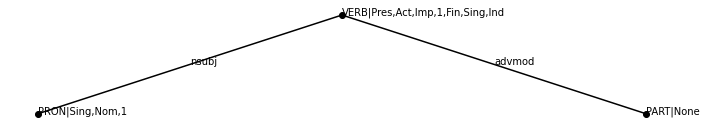

136


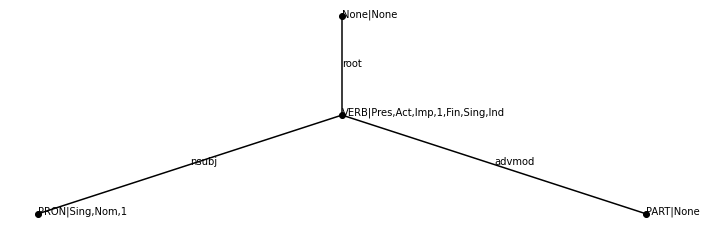

132


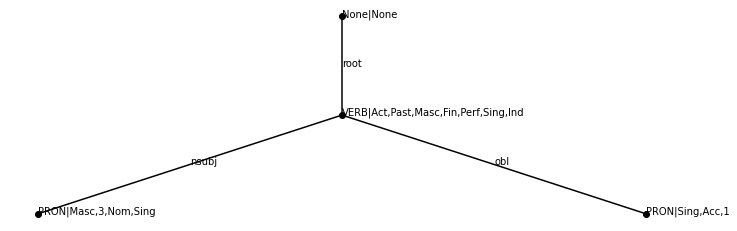

132


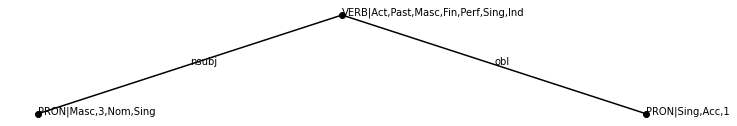

102


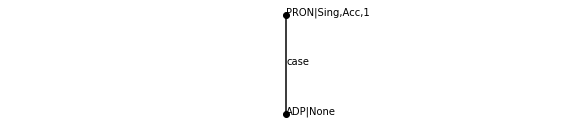

98


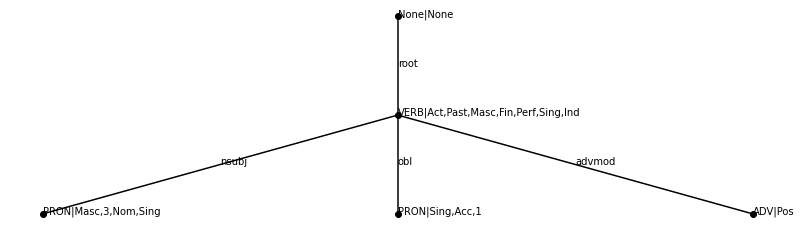

98


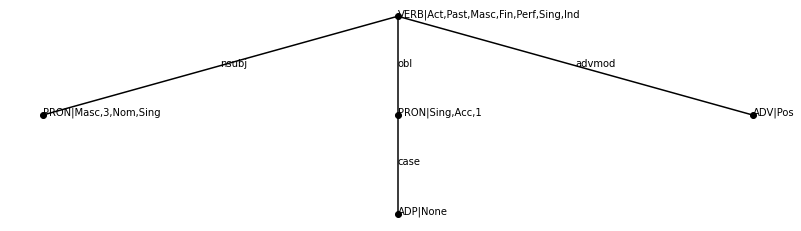

96


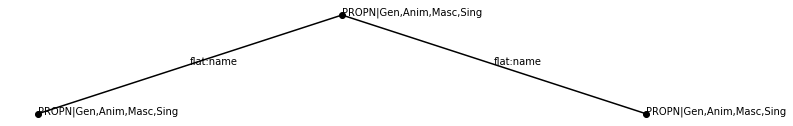

90


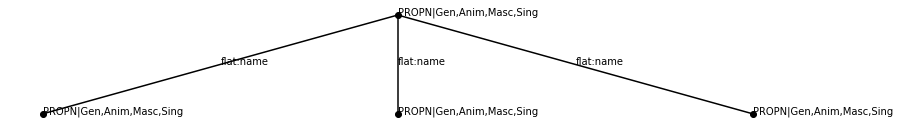

83


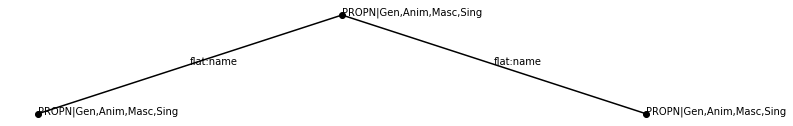

In [ ]:
cell, deprel, three, freq = get_data('gpt2')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### SynTagRus

955


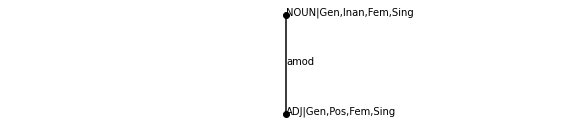

763


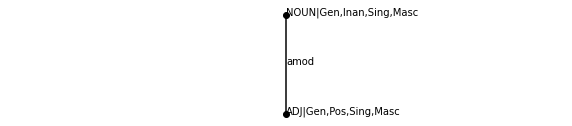

622


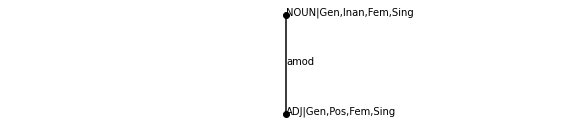

594


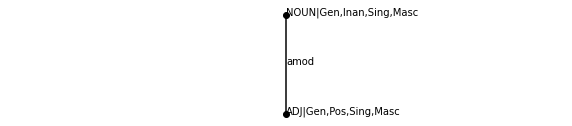

496


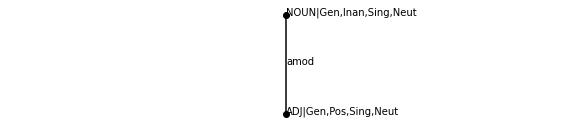

485


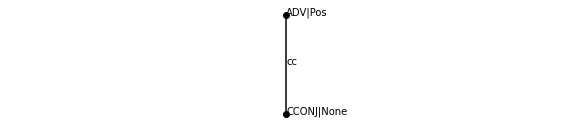

459


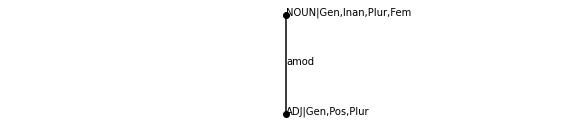

452


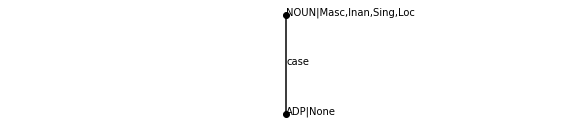

424


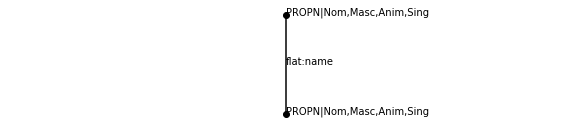

421


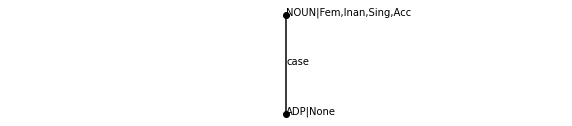

404


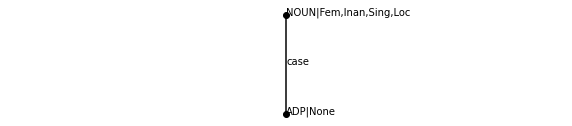

391


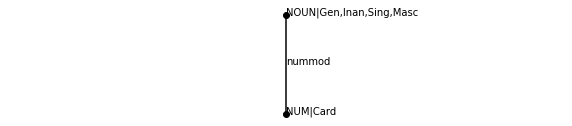

369


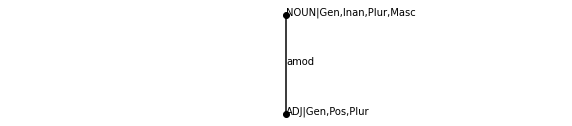

363


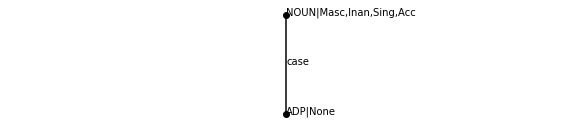

349


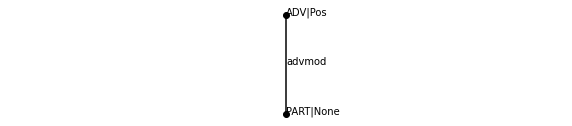

335


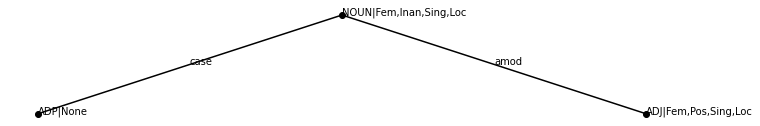

321


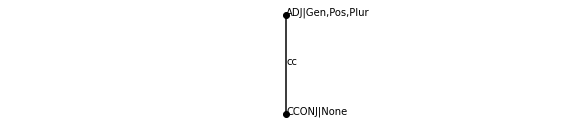

320


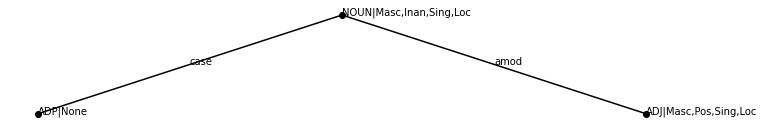

317


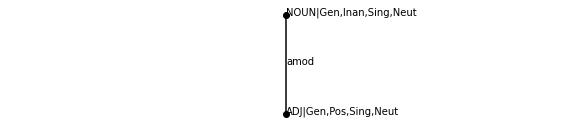

313


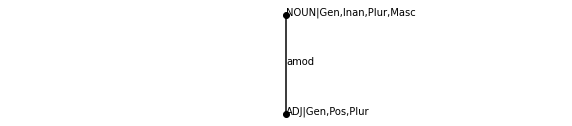

293


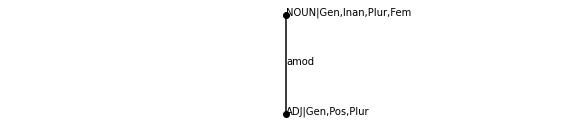

287


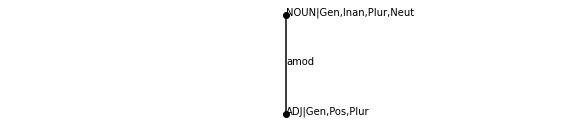

272


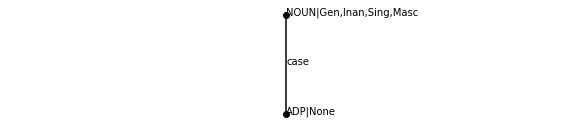

267


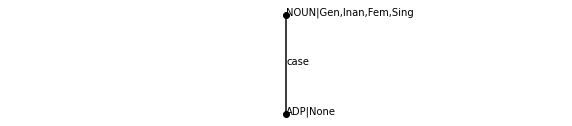

250


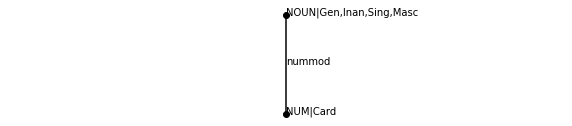

247


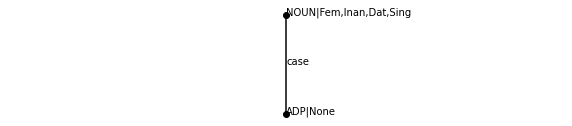

230


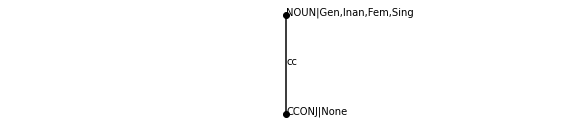

227


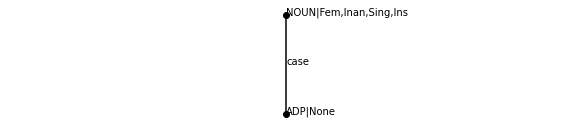

225


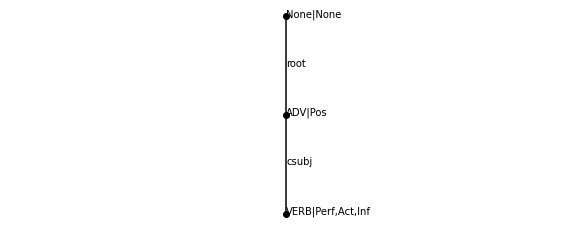

224


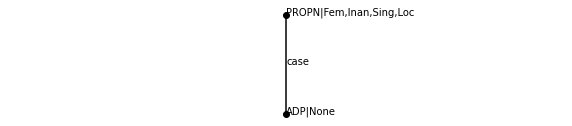

214


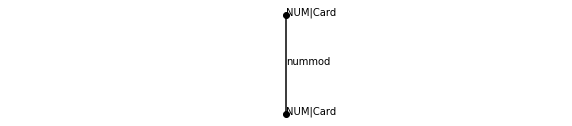

211


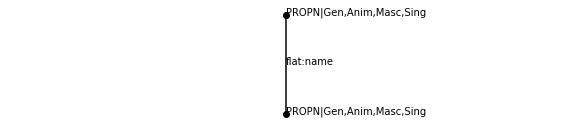

210


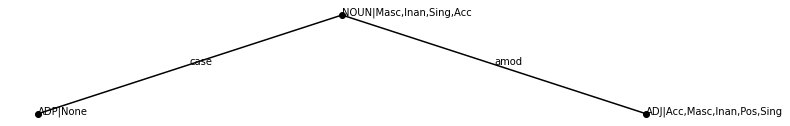

209


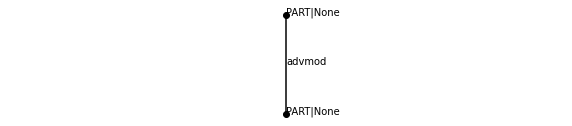

205


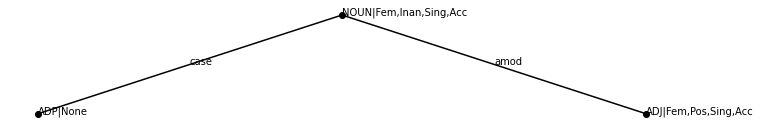

202


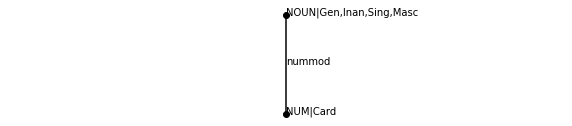

200


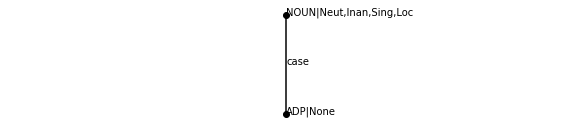

196


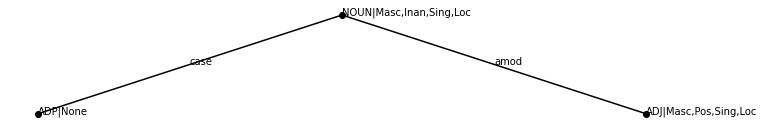

191


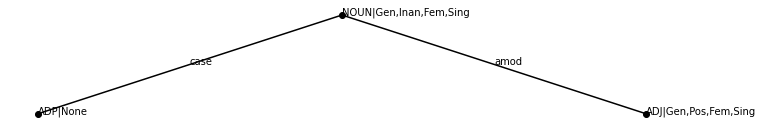

190


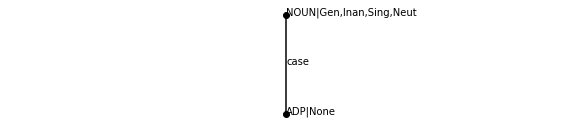

188


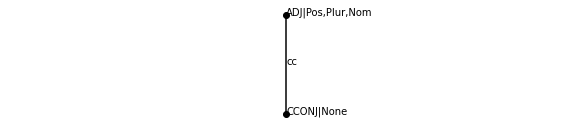

186


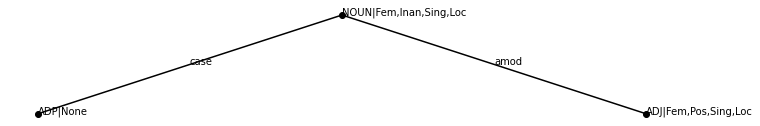

186


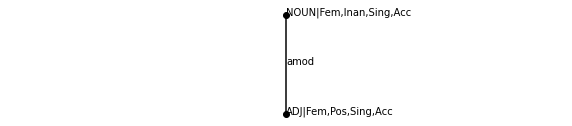

186


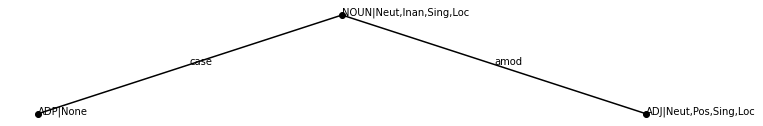

179


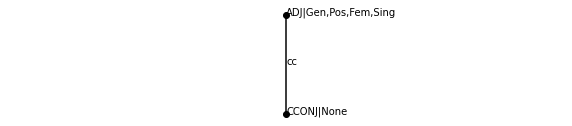

179


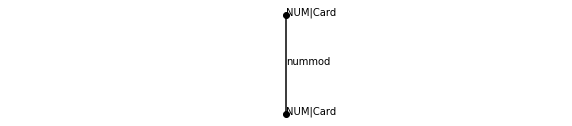

178


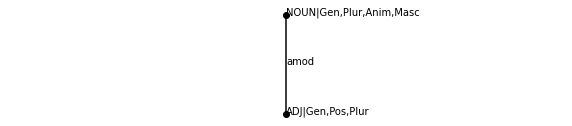

177


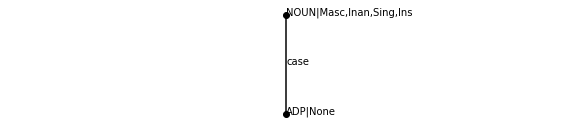

177


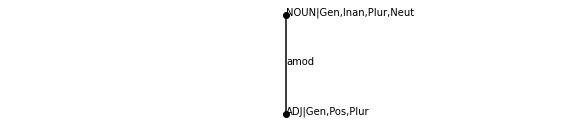

174


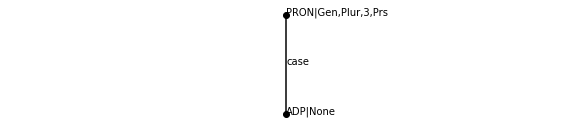

169


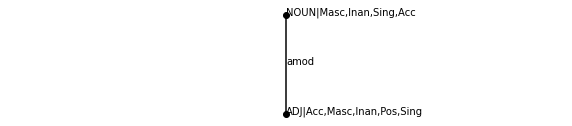

169


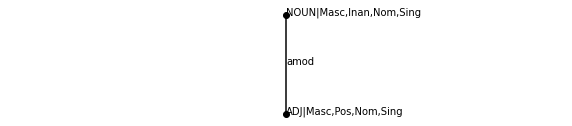

167


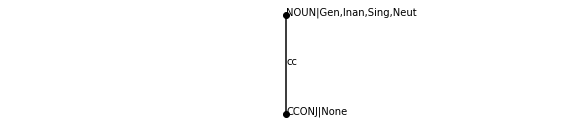

166


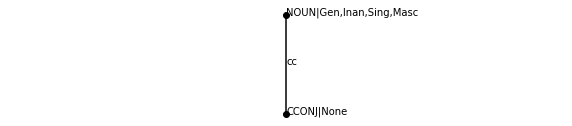

166


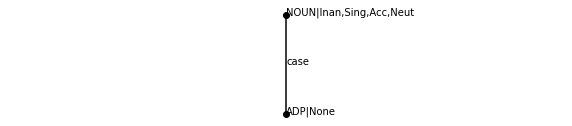

164


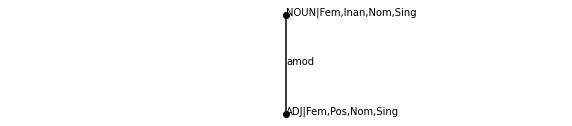

162


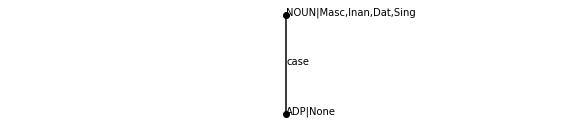

159


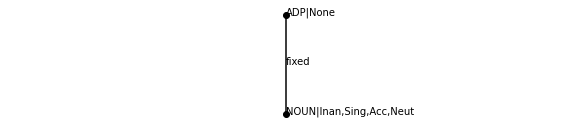

156


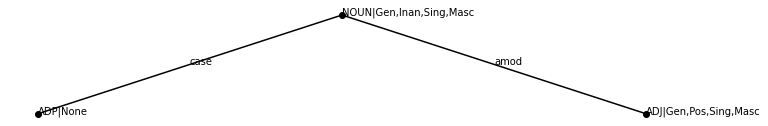

155


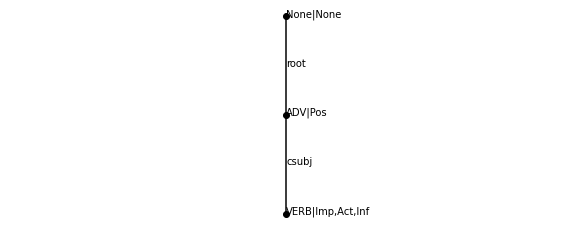

155


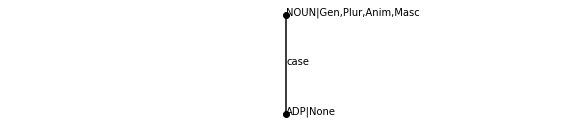

154


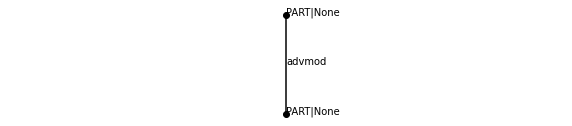

153


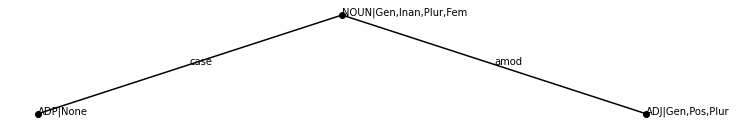

149


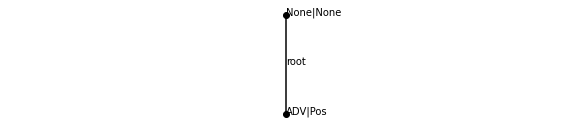

148


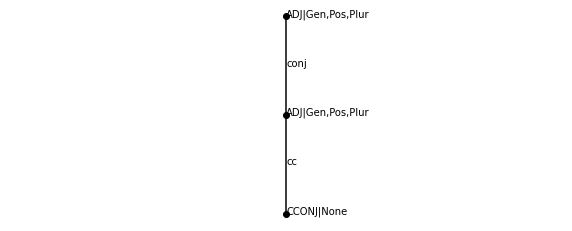

147


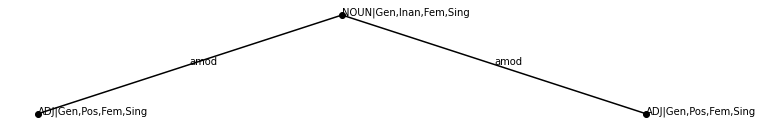

146


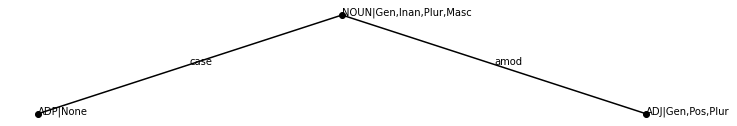

143


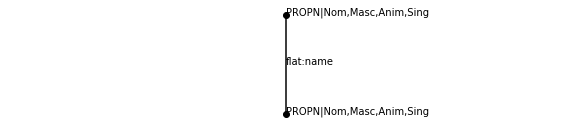

141


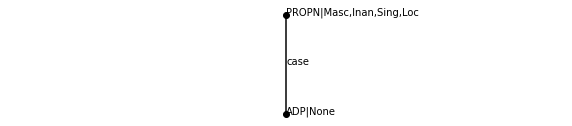

141


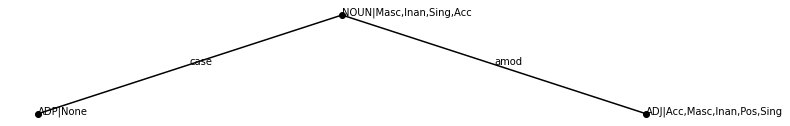

140


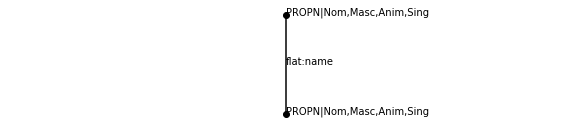

138


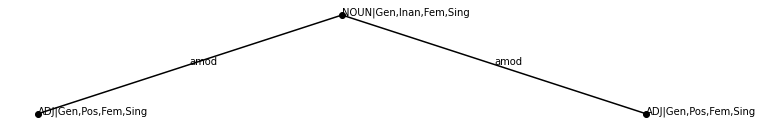

135


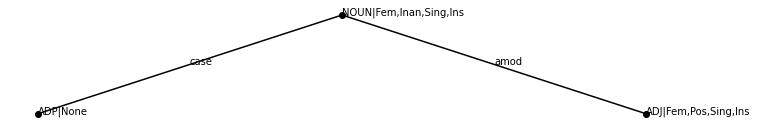

134


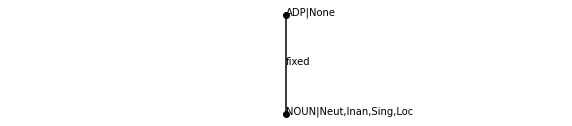

130


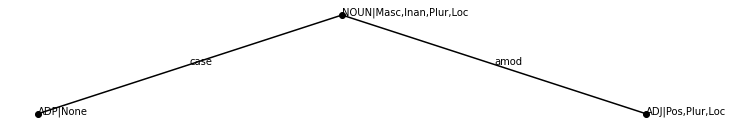

128


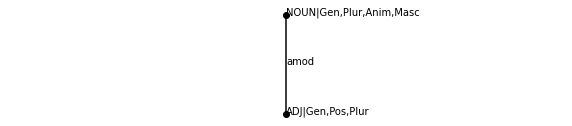

127


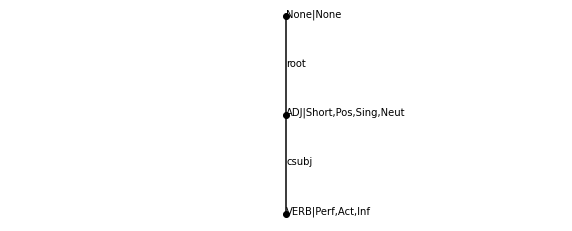

124


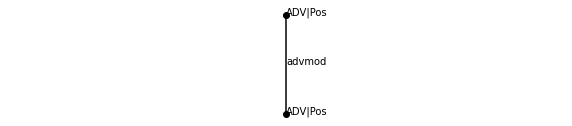

124


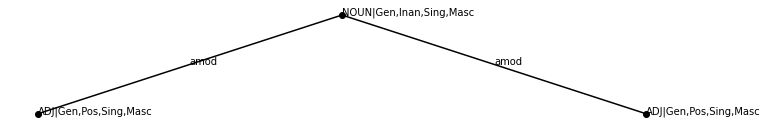

124


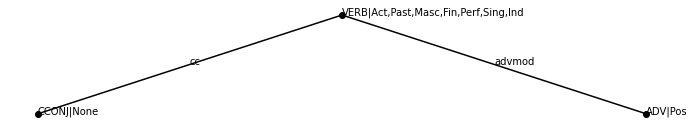

123


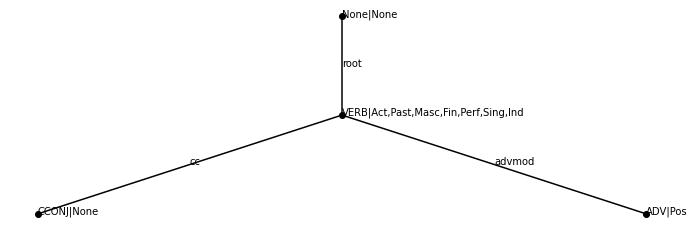

123


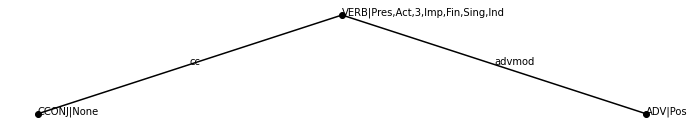

121


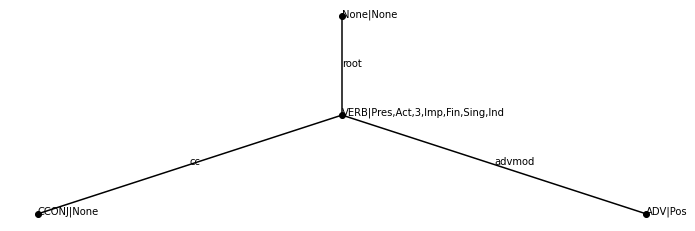

121


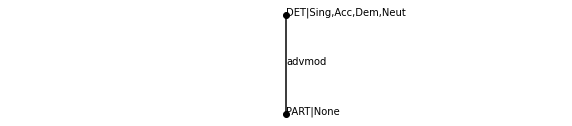

119


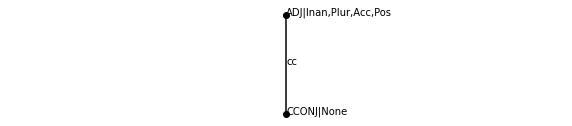

118


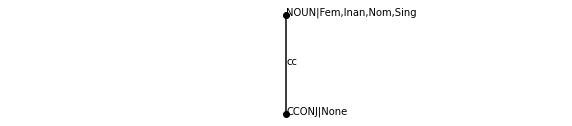

118


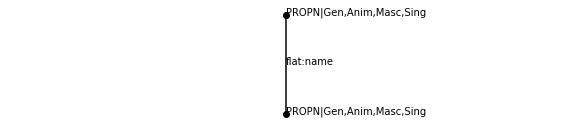

118


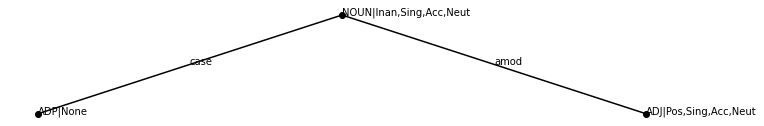

118


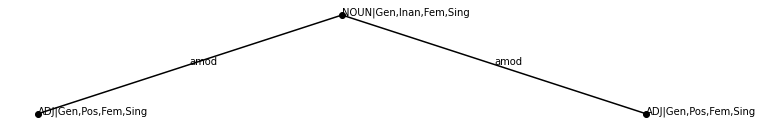

117


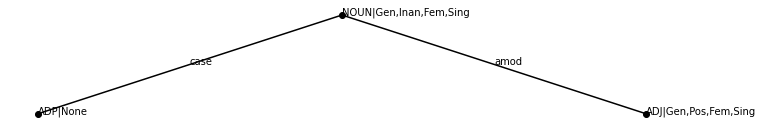

117


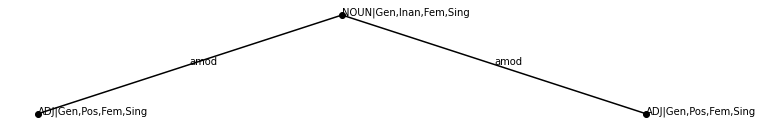

117


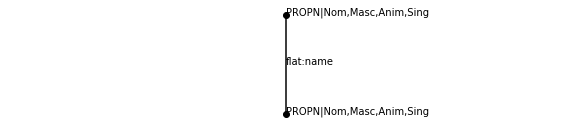

116


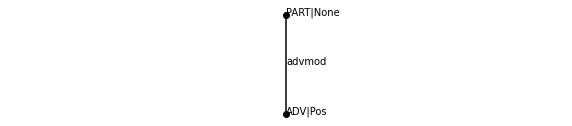

115


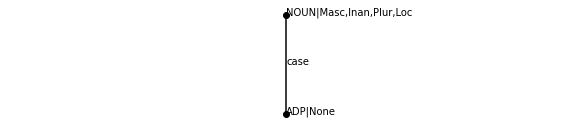

114


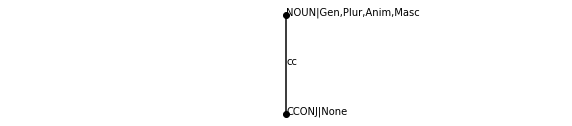

113


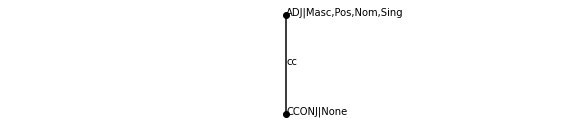

110


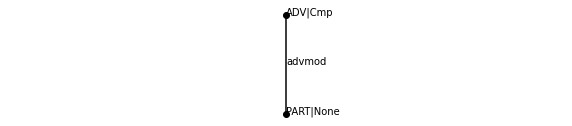

110


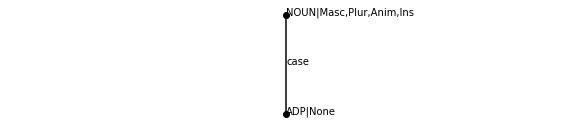

109


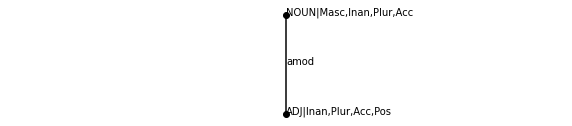

108


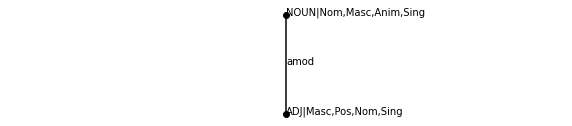

In [ ]:
cell, deprel, three, freq = get_data('Russian_SynTagRus')
lst, nums = get_all(cell, deprel, three, freq, line=100, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### Human RuATD

3218


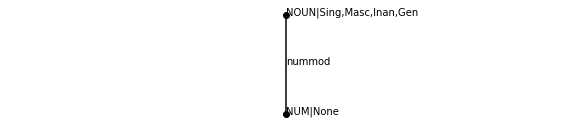

2649


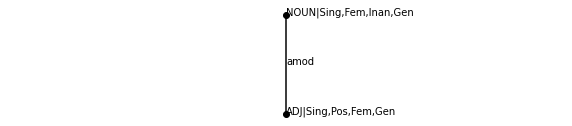

2418


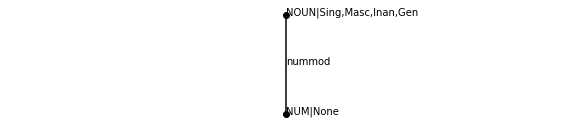

1882


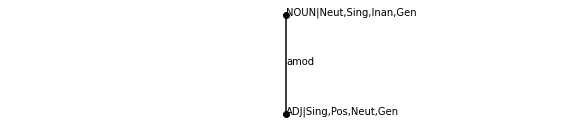

1754


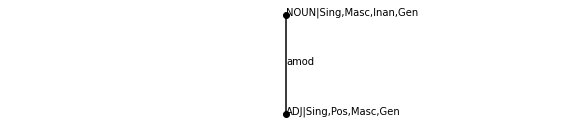

1488


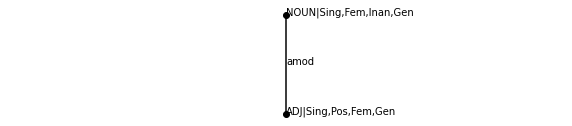

1345


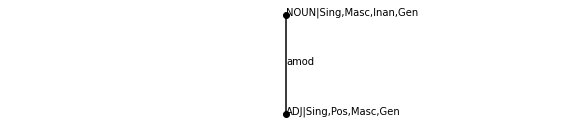

1305


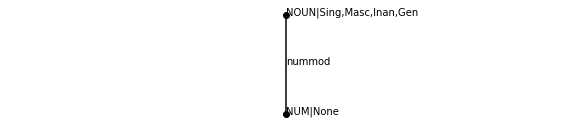

1092


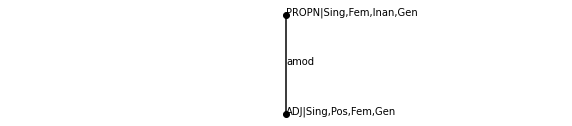

1080


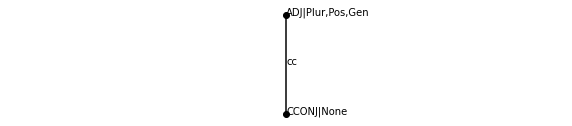

In [ ]:
cell, deprel, three, freq = get_data('human')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### Machine

5188


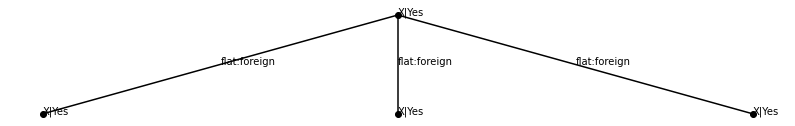

4437


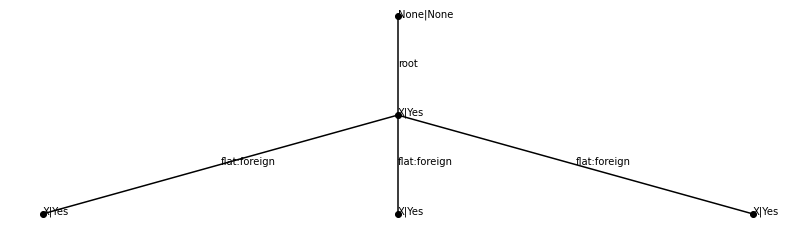

3277


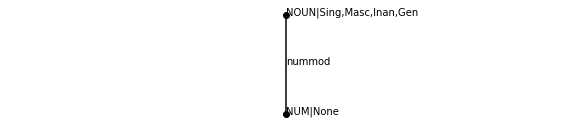

2643


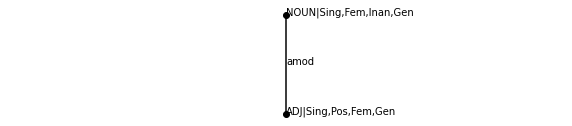

2454


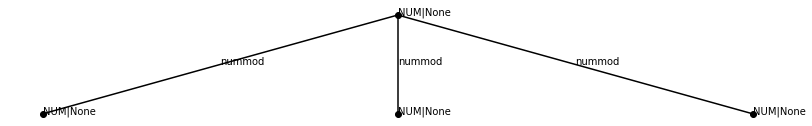

2442


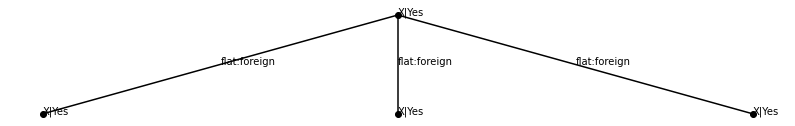

2246


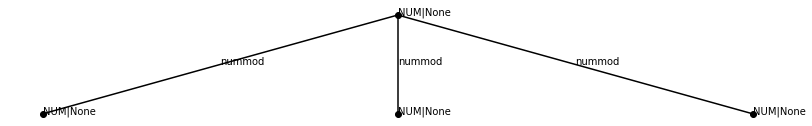

2158


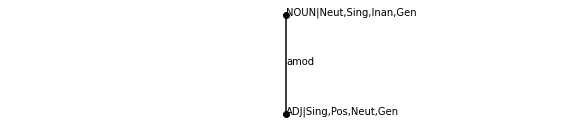

2057


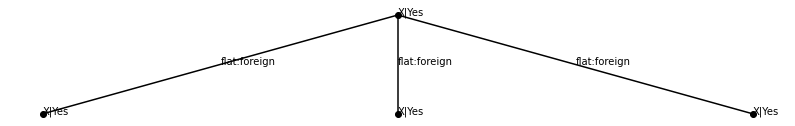

1911


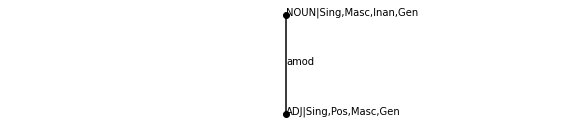

In [ ]:
cell, deprel, three, freq = get_data('machine')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### Czech

1096


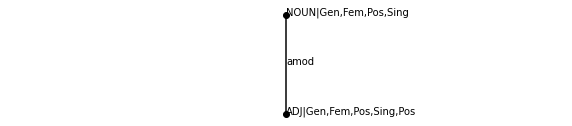

828


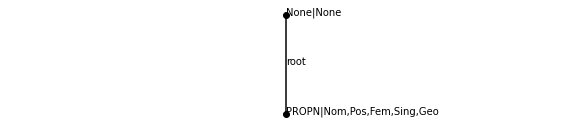

755


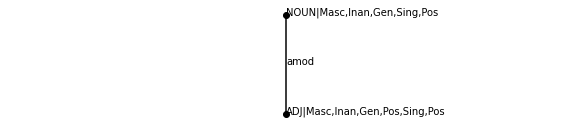

579


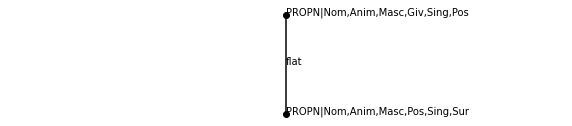

578


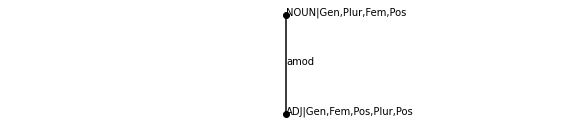

539


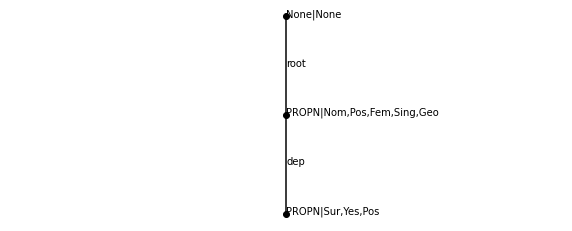

509


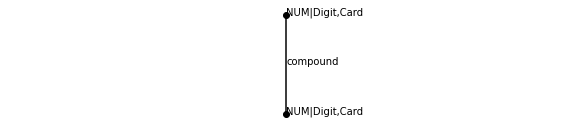

472


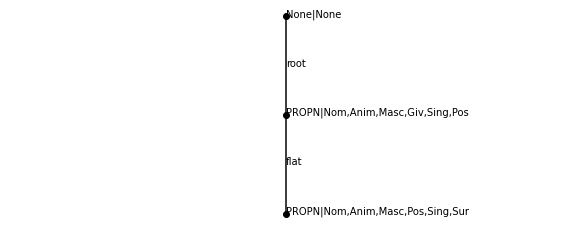

472


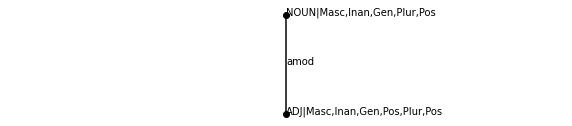

455


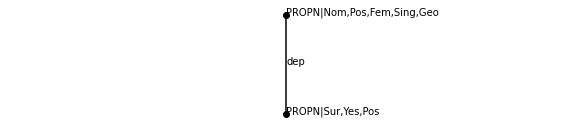

In [ ]:
cell, deprel, three, freq = get_data('Czech_PDT')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### Belarusian

445


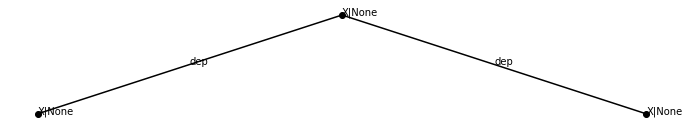

438


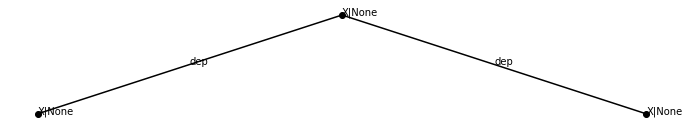

224


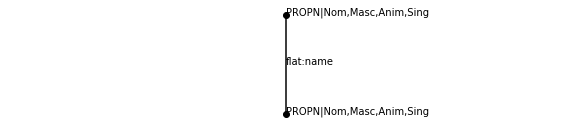

206


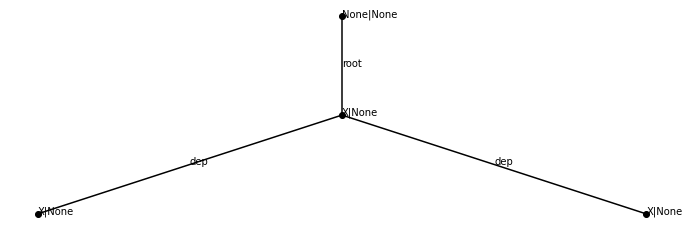

204


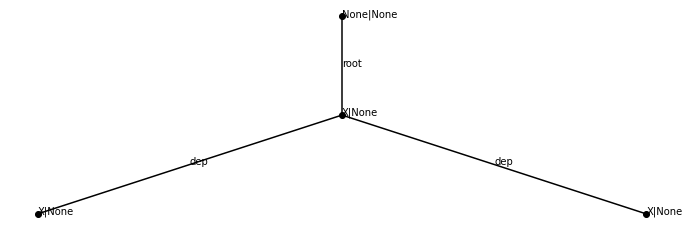

187


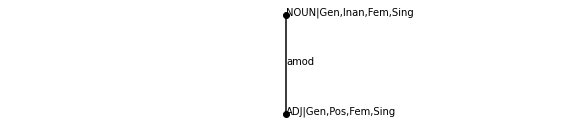

172


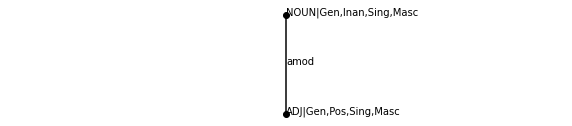

162


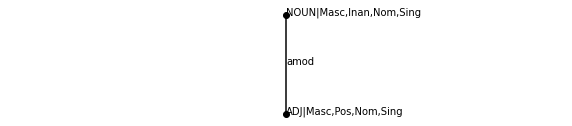

148


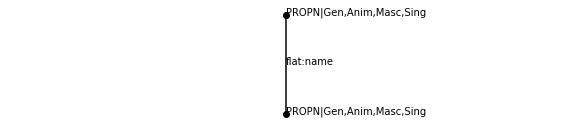

137


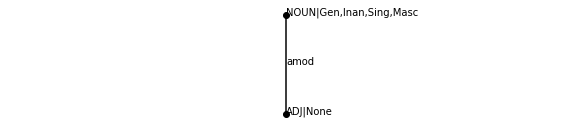

In [ ]:
cell, deprel, three, freq = get_data('Belarusian_HSE')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### English

586


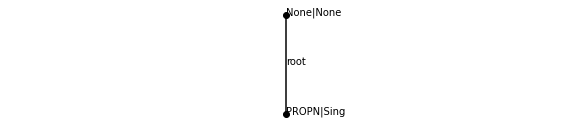

360


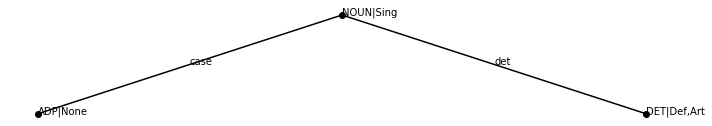

268


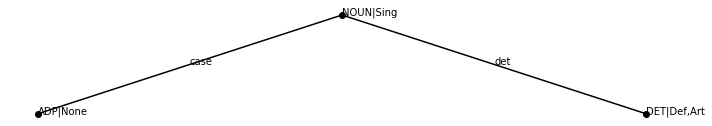

240


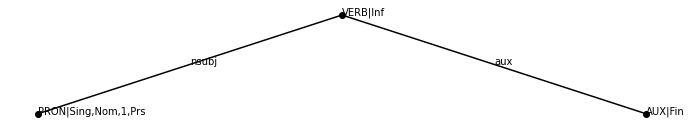

236


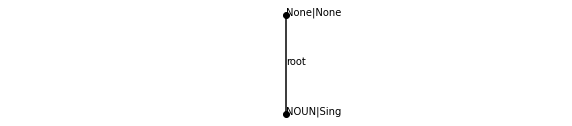

234


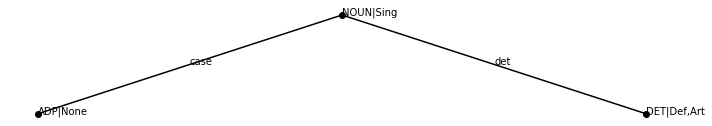

233


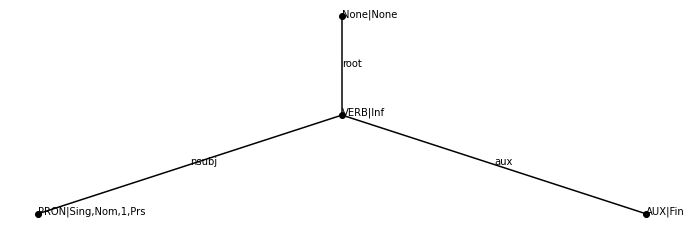

208


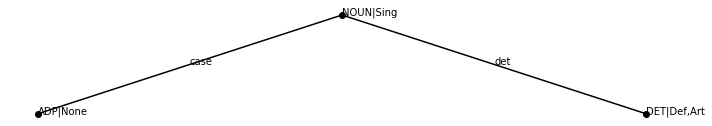

208


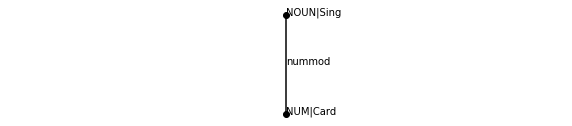

193


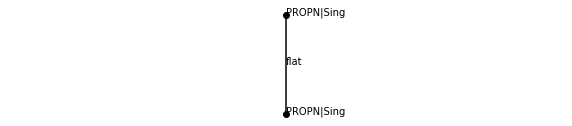

In [ ]:
cell, deprel, three, freq = get_data('English_EWT')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### German

3593


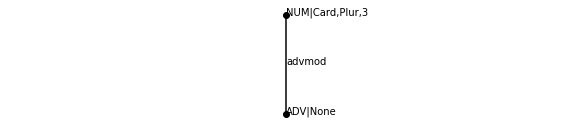

2062


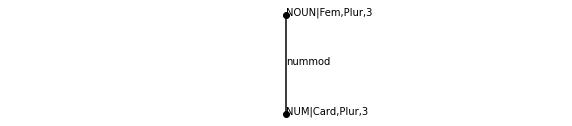

1510


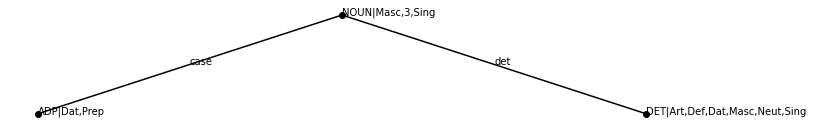

1483


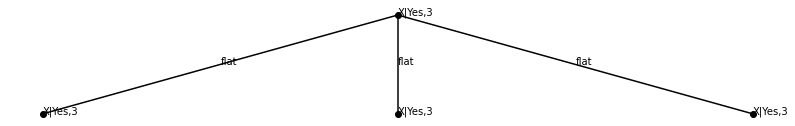

1415


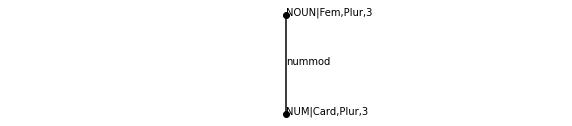

1351


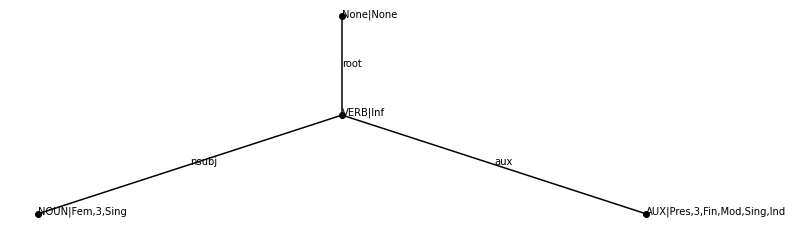

1328


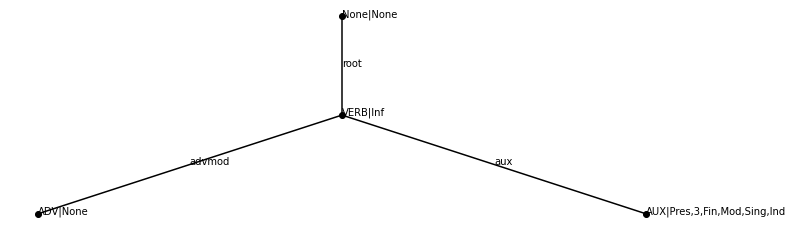

1320


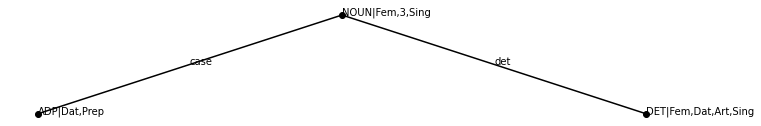

1286


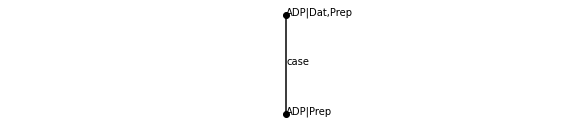

1276


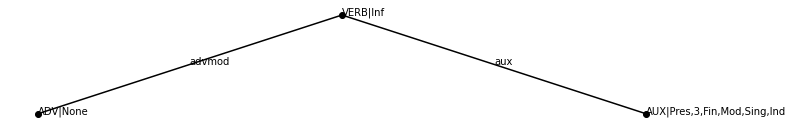

In [ ]:
cell, deprel, three, freq = get_data('German_HDT')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

### Japanese

10431


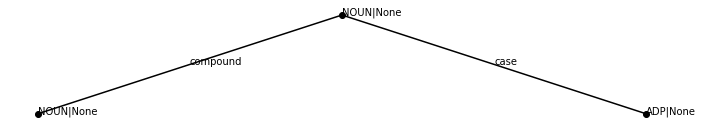

8926


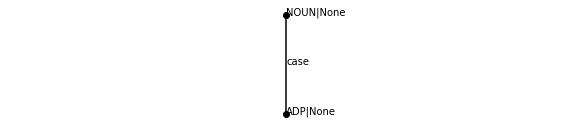

7072


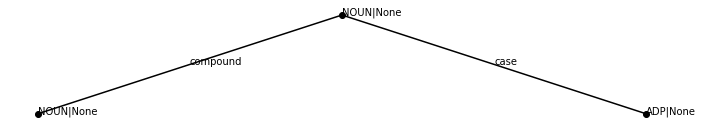

6634


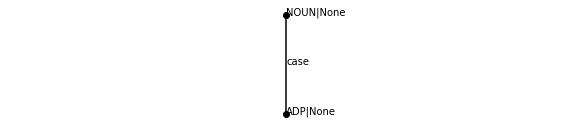

4697


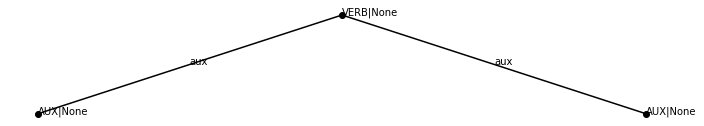

4497


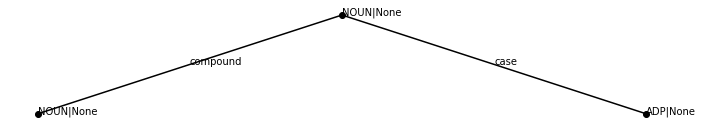

4373


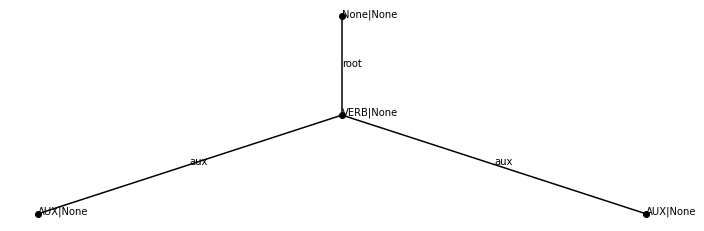

3812


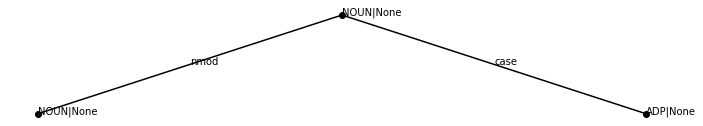

3805


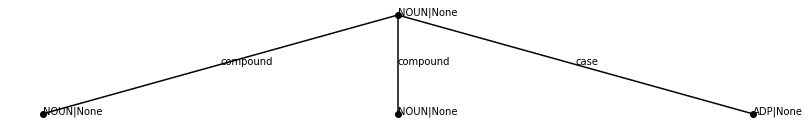

3710


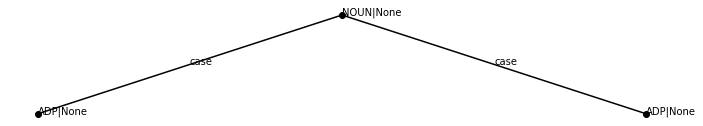

In [ ]:
cell, deprel, three, freq = get_data('Japanese_BCCWJ')
lst, nums = get_all(cell, deprel, three, freq, line=10, nn=False)
for i, el in enumerate(lst):
    print(nums[i])
    draw_tree(el[0])

In [ ]:
def get_trees(name):
    # with open(f'{new_path}/{name}/{name}.json', encoding='utf-8') as f:
    #     text = json.load(f)
    with open(name, encoding='utf-8') as f:
        text = json.load(f)
    return text

In [ ]:
def get_seq_one(tree):
    lst = []
    s = [el[0] for el in tree[1:]]
    if len(s) > 0:
        lst.append(tuple(s))
    for el in tree[1:]:
        new_lst = get_seq_one(el[1])
        lst.extend(new_lst)
    return lst

In [ ]:
def get_seq_all(trees):
    dct = Counter()
    for tree in trees:
        dct.update(get_seq_one(tree))
    return dct

In [ ]:
def get_dct(name):
    trs = get_trees(name)
    dct = get_seq_all(trs)
    return dct

In [ ]:
def get_common(d1, d2):
    l1 = set(d1.keys())
    l2 = set(d2.keys())
    return l1 & l2

In [ ]:
def get_pos(ref, keys):
    res = {}
    for i, el in enumerate(ref.keys()):
        if el in keys:
            res[el] = i
    res = [i[1] for i in sorted(res.items(), key=lambda x: x[0])]
    return res

In [ ]:
def compare_two(d1, d2):
    common = get_common(d1, d2)
    res1 = get_pos(d1, common)
    res2 = get_pos(d2, common)
    sp, p_sp = stats.spearmanr(res1, res2)
    kn, p_kn = stats.kendalltau(res1, res2)
    return sp, p_sp, kn, p_kn

In [ ]:
def count_small():
    dct_eng = get_dct('English_EWT')
    dct_rus = get_dct('Russian_SynTagRus')
    dct_fin = get_dct('Finnish_TDT')
    dct_jap = get_dct('Japanese_BCCWJ')
    dct_ice = get_dct('Icelandic_IcePaHC')
    dct_all = [dct_eng, dct_rus, dct_fin, dct_jap, dct_ice]
    names = ['eng', 'rus', 'fin', 'jap', 'ice']
    res = {}
    for i in range(len(dct_all)):
        for j in range(i, len(dct_all)):
            if i != j:
                print(names[i], names[j])
                res[f'{names[i]}_{names[j]}'] = compare_two(dct_all[i], dct_all[j])
    return res

In [ ]:
def count_all():
    path = '/content/drive/MyDrive/trees/trees_data/foreign'
    lst = os.listdir(path)
    res = {}
    for el in lst:
        print(el)
        dct_ref = get_dct(f'{path}/{el}')
        res[el.split('.')[0]] = {}
        for el1 in tqdm(lst, total=len(lst)):
            dct_cur = get_dct(f'{path}/{el1}')
            res[el.split('.')[0]][el1.split('.')[0]] = compare_two(dct_ref, dct_cur)
        with open('/content/drive/MyDrive/trees/corr_stats.json', 'w', encoding='utf-8') as f:
            json.dump(res, f)

In [ ]:
count_all()

In [ ]:
with open(f'{path}/corr_stats.json', encoding='utf-8') as f:
    corr = json.load(f)

In [ ]:
with open(f'{path}/probs/order.txt', encoding='utf-8') as f:
    order = f.read().splitlines()

In [ ]:
sns.set(rc={'figure.figsize':(13, 10)})

In [ ]:
def get_heatmap_corr(data, x, order):
    small_data = {}
    for el in order:
        if el in data:
            small_data[el] = {}
            for el1 in order:
                if el1 in data[el]:
                    small_data[el][el1] = data[el][el1][x]
    df_old = pd.DataFrame(small_data).transpose().fillna(0)
    df = df_old.to_numpy()
    sns.heatmap(df_old, cmap='terrain')
    return df

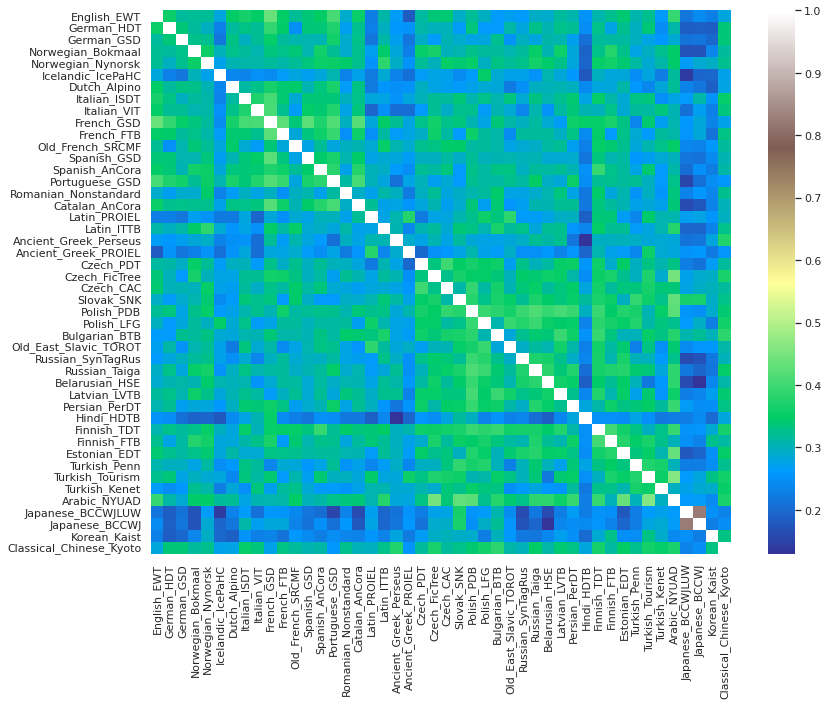

In [ ]:
df = get_heatmap_corr(corr, 0, order) 

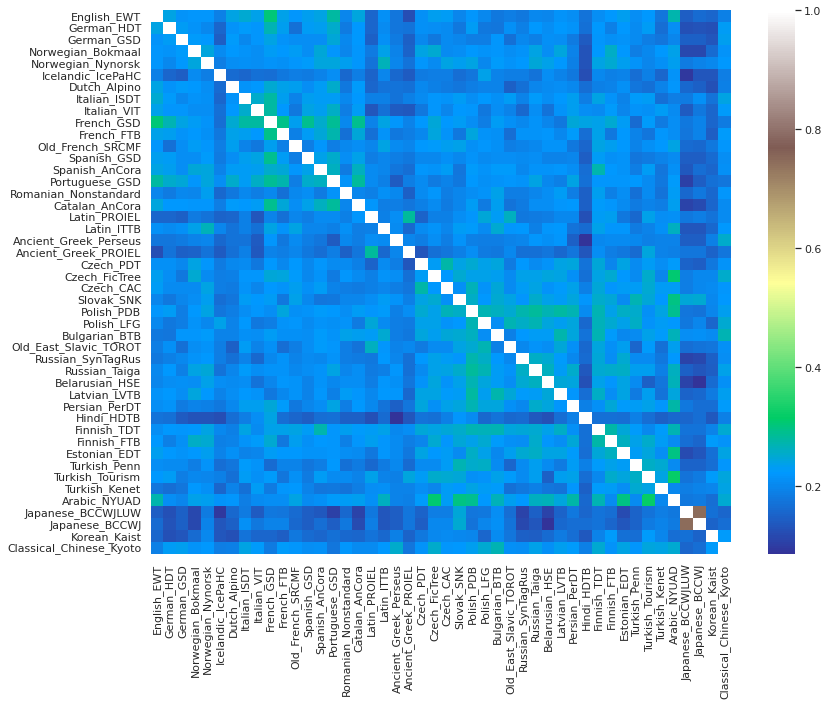

In [ ]:
df = get_heatmap_corr(corr, 2, order) 